In [1]:
!mkdir -p /root/.kaggle

In [2]:
import shutil
shutil.move('kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [3]:
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d marshalpatel3558/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset
License(s): MIT
  0% 0.00/319k [00:00<?, ?B/s]
100% 319k/319k [00:00<00:00, 556MB/s]


In [5]:
!unzip /content/diabetes-prediction-dataset.zip

Archive:  /content/diabetes-prediction-dataset.zip
  inflating: diabetes_dataset.csv    


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.set_option('display.max_columns', None)

In [17]:
df = df.loc[:, df.columns != 'Unnamed: 0']

In [9]:
df = pd.read_csv('/content/diabetes_dataset.csv')
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [10]:
df = df.drop(columns=["Unnamed: 0"])

In [11]:
df['Diabetes'] = 0

In [12]:
df.loc[(df["HbA1c"] >= 6.5) | (df["Fasting_Blood_Glucose"] >= 200), "Diabetes"] = 2
df.loc[((df["HbA1c"] >= 5.7) & (df["HbA1c"] < 6.5)) |
       ((df["Fasting_Blood_Glucose"] >= 140) & (df["Fasting_Blood_Glucose"] < 200)), "Diabetes"] = 1

In [13]:
df.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,2
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,1
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,1
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  int64  
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

In [15]:
df['Diabetes'].value_counts()

,count
Diabetes,
1,4994
2,4225
0,781


<Axes: xlabel='count', ylabel='Diabetes'>

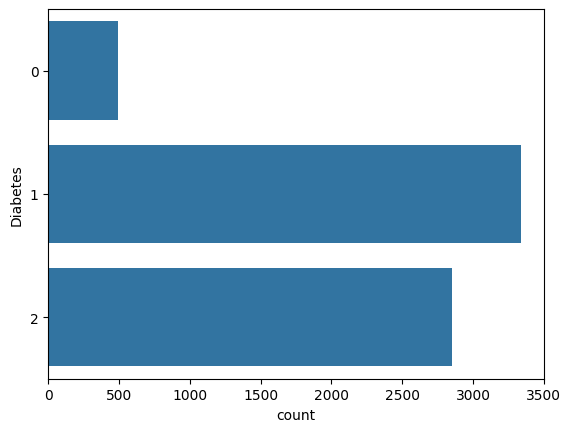

In [32]:
sns.countplot(data=df, y="Diabetes")

In [18]:
df.isnull().sum()

,0
Age,0
Sex,0
Ethnicity,0
BMI,0
Waist_Circumference,0
Fasting_Blood_Glucose,0
HbA1c,0
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0
Cholesterol_Total,0


In [20]:
df.dropna(subset='Alcohol_Consumption', inplace = True)

In [22]:
df['Alcohol_Consumption'].isnull().sum()

np.int64(0)

In [24]:
X = df.drop('Diabetes', axis = 1)
y = df['Diabetes'].copy()

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
8466,23,Male,Hispanic,21.1,105.3,197.4,6.6,121,92,238.7,32.9,146.1,90.6,6.5,Moderate,3246,Moderate,Current,1,0
2957,46,Female,Hispanic,28.2,116.6,130.3,8.0,118,78,186.1,62.8,99.8,22.8,6.6,High,3142,Moderate,Former,0,0
5801,63,Male,White,37.7,74.5,143.6,8.5,177,78,191.5,50.3,172.3,53.0,3.3,Moderate,3676,Heavy,Current,0,0
1844,30,Female,White,21.7,101.0,169.1,10.4,159,89,191.5,79.9,91.4,44.3,4.1,High,2306,Moderate,Current,0,0
6878,66,Female,Asian,19.7,118.9,158.9,9.0,121,80,284.5,42.3,134.7,79.9,5.8,Low,2411,Moderate,Former,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8459,40,Male,Black,32.5,86.7,151.0,8.9,121,107,288.6,33.2,115.0,23.4,6.9,Moderate,2446,Moderate,Never,0,0
1820,51,Female,White,32.9,92.6,149.5,4.6,173,97,215.0,65.5,99.3,33.7,7.3,Low,3562,Heavy,Never,0,1
9091,38,Female,Black,27.0,75.4,137.3,11.0,149,114,196.1,45.5,174.8,38.9,4.2,Low,2441,Moderate,Current,0,0
7858,69,Female,Hispanic,35.6,111.3,104.0,10.4,93,69,187.0,69.0,150.1,47.4,7.2,High,3907,Heavy,Current,0,1


In [29]:
y_train

,Diabetes
8466,1
2957,2
5801,1
1844,1
6878,1
...,...
8459,1
1820,1
9091,2
7858,2


In [33]:
num_features = X_train.select_dtypes(include = [np.number]).columns
cat_features = X_train.select_dtypes(exclude = [np.number]).columns